In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [98]:
df = pd.read_csv("AAPL.csv")

In [100]:
df_AAPL = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df_AAPL.rename(columns = {'Close': 'Close_AAPL', 'Volume': 'Volume_AAPL'})

,Date,Close_AAPL,Volume_AAPL
0,2021-01-04,129.410004,143301900
1,2021-01-05,131.009995,97664900
2,2021-01-06,126.599998,155088000
3,2021-01-07,130.919998,109578200
4,2021-01-08,132.050003,105158200
...,...,...,...
498,2022-12-23,131.860001,63814900
499,2022-12-27,130.029999,69007800
500,2022-12-28,126.040001,85438400
501,2022-12-29,129.610001,75703700


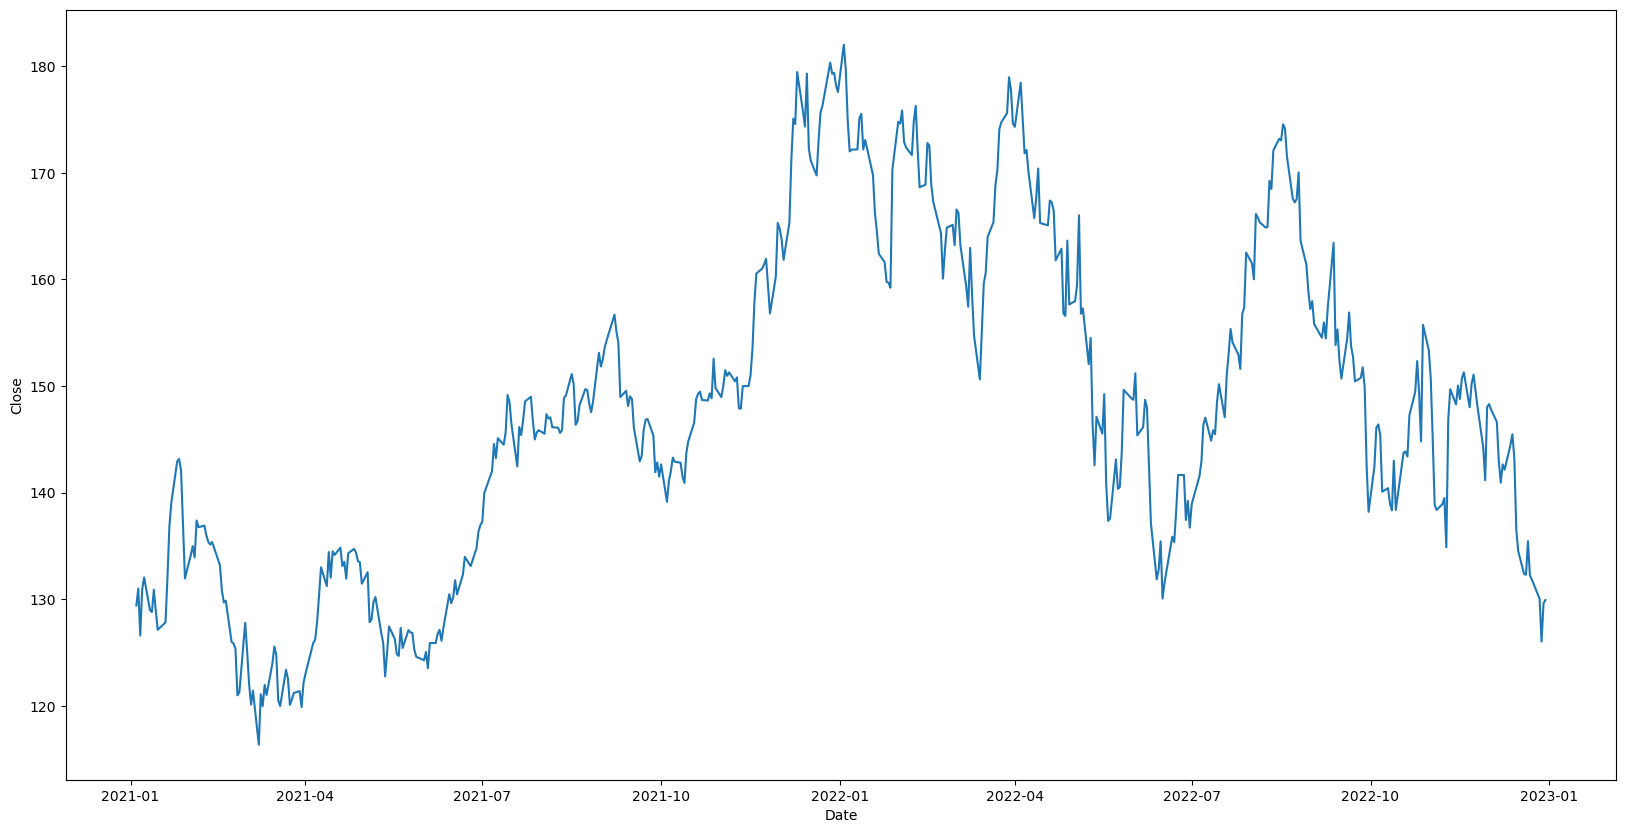

In [101]:
df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'])

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_AAPL)
plt.show()

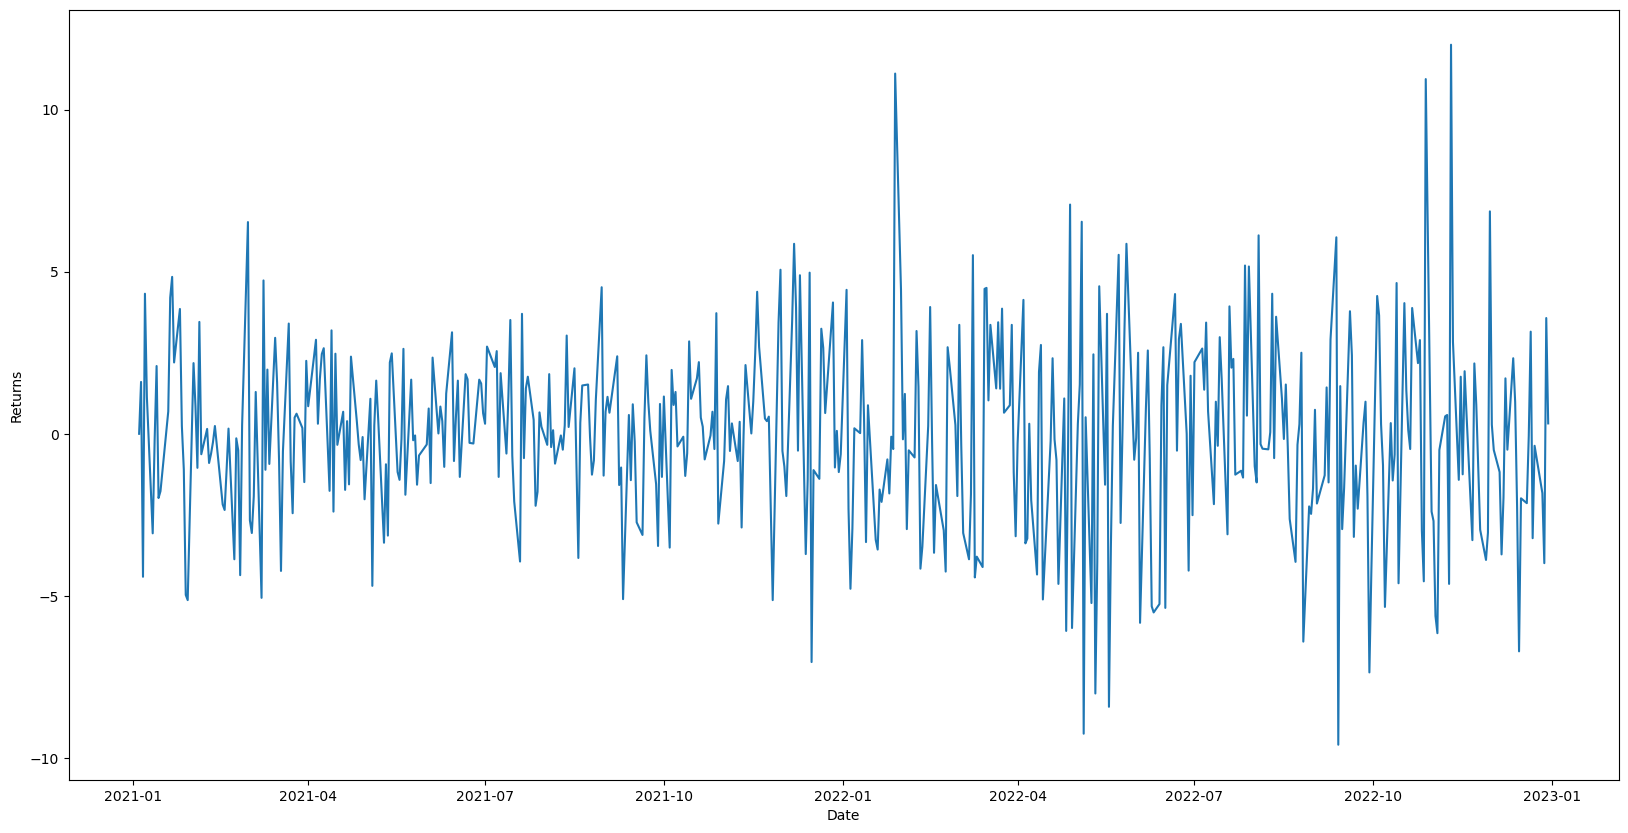

In [102]:
onedaydiff1 = df_AAPL.Close.diff()
df_AAPL['Returns'] = onedaydiff1.fillna(0)

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_AAPL)
plt.show()

In [103]:
df = pd.read_csv("MSFT.csv")
df_MSFT = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df_MSFT.rename(columns = {'Close': 'Close_MSFT', 'Volume': 'Volume_MSFT'})

,Date,Close_MSFT,Volume_MSFT
0,2021-01-04,217.690002,37130100
1,2021-01-05,217.899994,23823000
2,2021-01-06,212.250000,35930700
3,2021-01-07,218.289993,27694500
4,2021-01-08,219.619995,22956200
...,...,...,...
498,2022-12-23,238.729996,21207000
499,2022-12-27,236.960007,16688600
500,2022-12-28,234.529999,17457100
501,2022-12-29,241.009995,19770700


<AxesSubplot:xlabel='Date', ylabel='Close'>

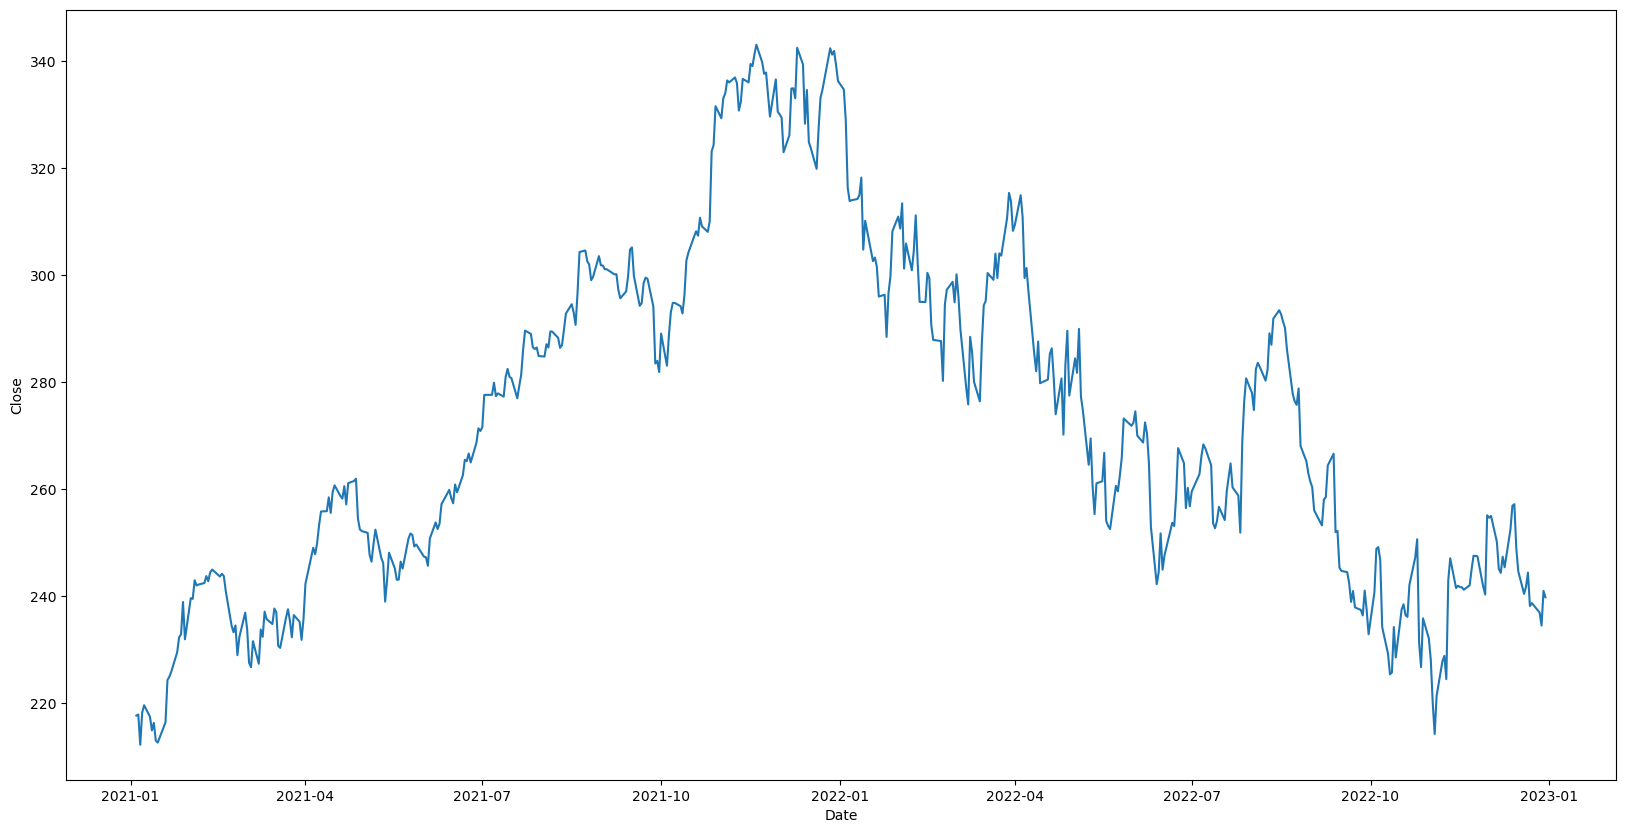

In [104]:
df_MSFT['Date'] = pd.to_datetime(df_MSFT['Date'])
plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_MSFT)

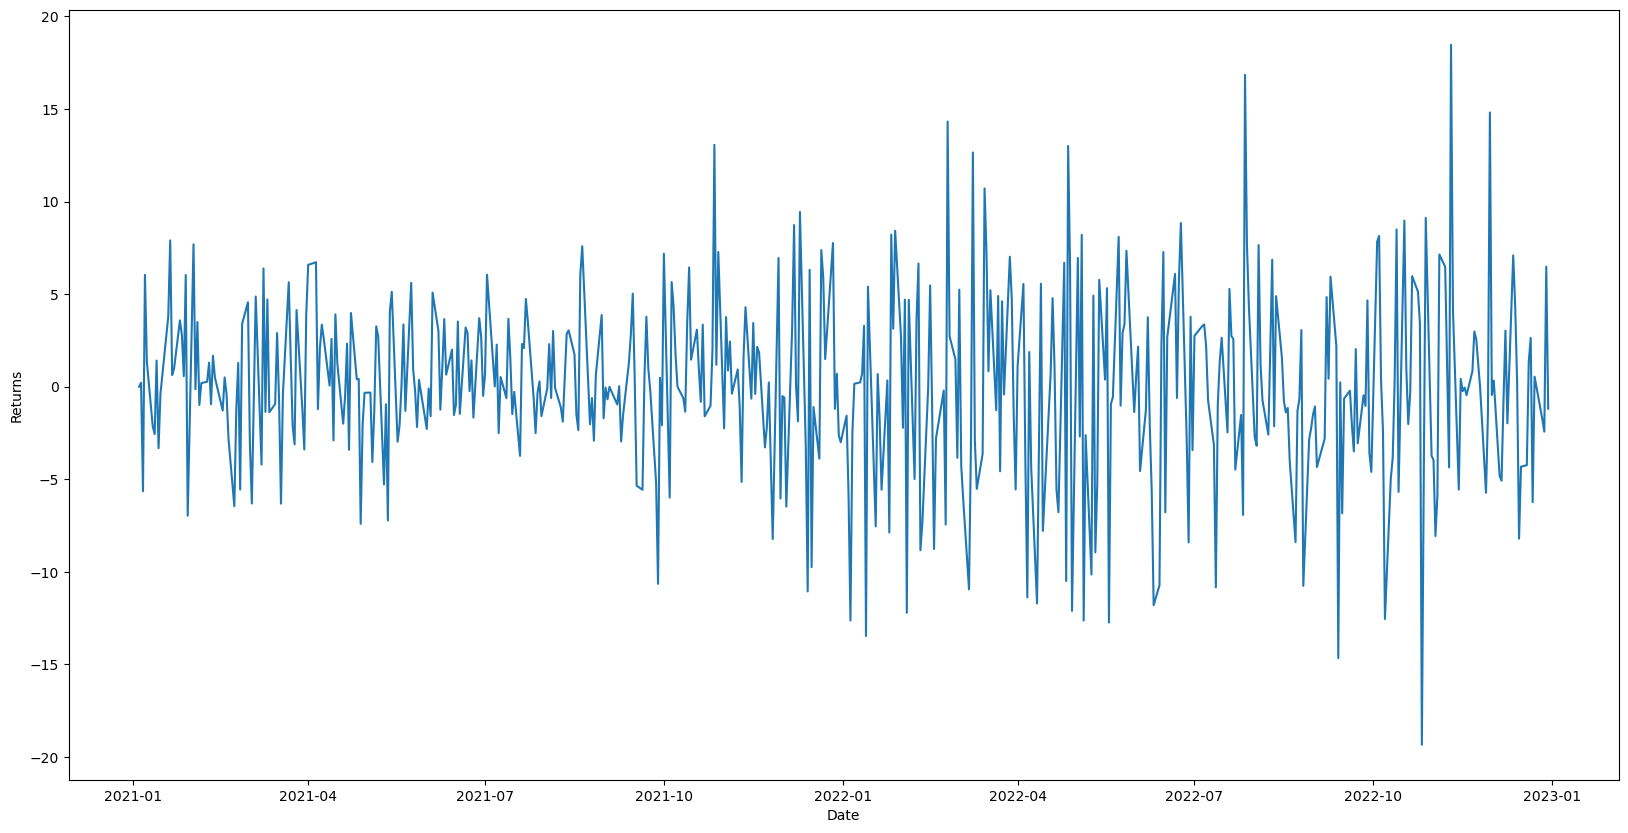

In [105]:
onedaydiff2 = df_MSFT.Close.diff()
df_MSFT['Returns'] = onedaydiff2.fillna(0)
plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_MSFT)
plt.show()

In [106]:
df = pd.read_csv("Samsung.csv")
df.shape

(492, 7)

In [107]:
df_SMSNG = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1)
df_SMSNG.rename(columns = {'Close': 'Close_SMSNG', 'Volume': 'Volume_SMSNG'})

,Date,Close_SMSNG,Volume_SMSNG
0,2021-01-04,83000.0,38655276
1,2021-01-05,83900.0,35335669
2,2021-01-06,82200.0,42089013
3,2021-01-07,82900.0,32644642
4,2021-01-08,88800.0,59013307
...,...,...,...
487,2022-12-23,58100.0,9829407
488,2022-12-26,57900.0,6756411
489,2022-12-27,58100.0,10667027
490,2022-12-28,56600.0,14665410


<AxesSubplot:xlabel='Date', ylabel='Close'>

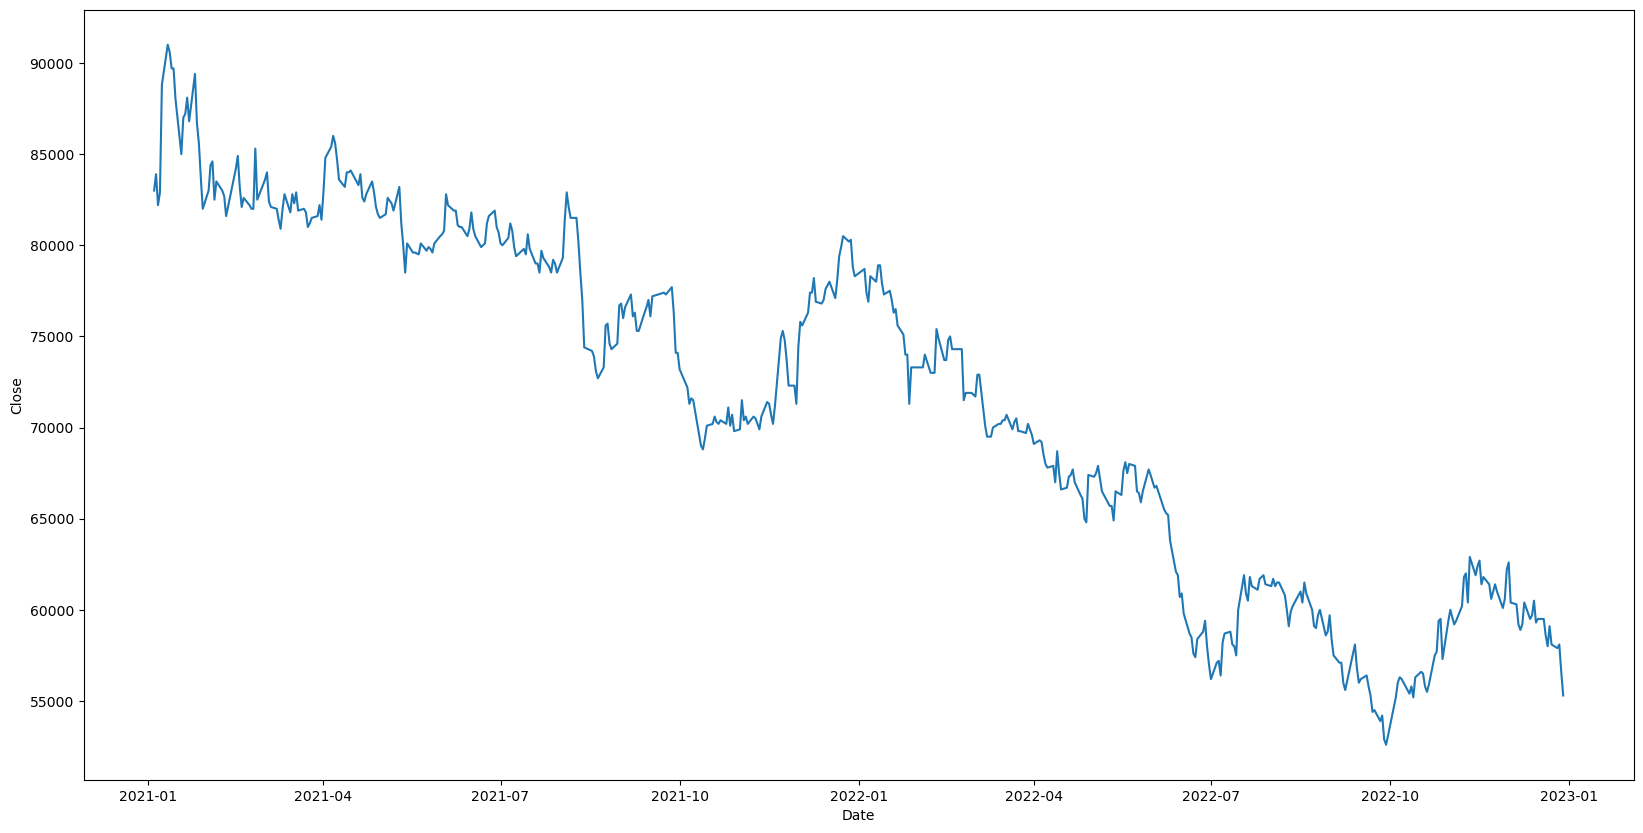

In [108]:
df_SMSNG['Date'] = pd.to_datetime(df_SMSNG['Date'])

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Close", data = df_SMSNG)

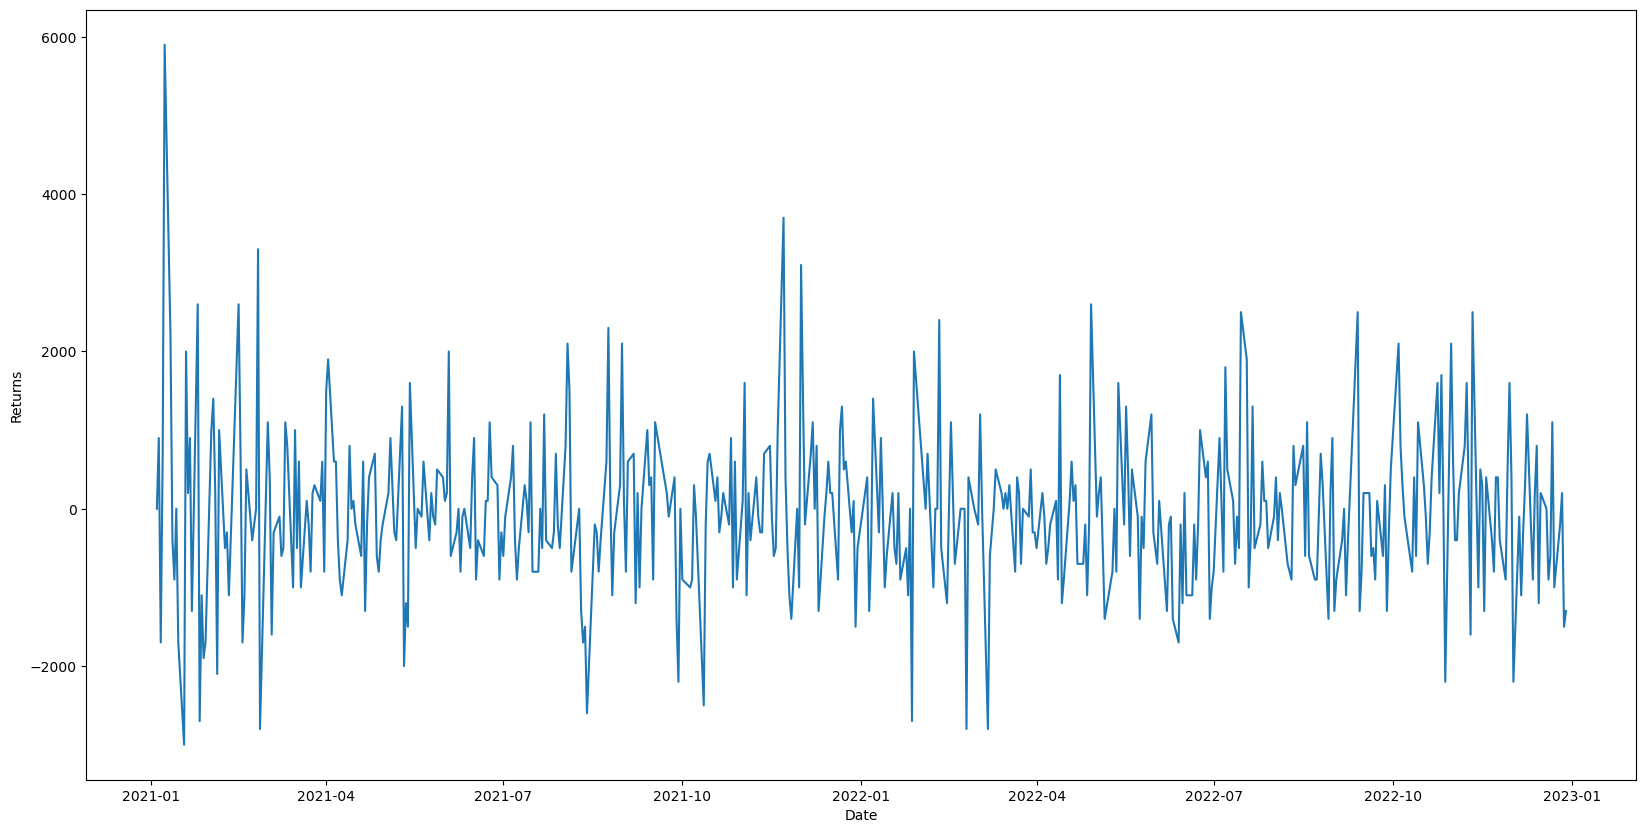

In [109]:
onedaydiff3 = df_SMSNG.Close.diff()
df_SMSNG['Returns'] = onedaydiff3.fillna(0)

plt.figure(figsize=(20,10))
sns.lineplot(x = "Date", y = "Returns", data = df_SMSNG)
plt.show()

In [27]:
df_All = pd.concat([df_AAPL, df_MSFT.drop(columns = ['Date']), df_SMSNG.drop(columns = ['Date'])], axis =1, join = 'inner')
df_All.head()

,Date,Close,Volume,Returns,Close,Volume,Returns,Close,Volume,Returns
0,2021-01-04,129.410004,143301900,0.000000,217.690002,37130100,0.000000,83000.0,38655276,0.0
1,2021-01-05,131.009995,97664900,1.599991,217.899994,23823000,0.209992,83900.0,35335669,900.0
2,2021-01-06,126.599998,155088000,-4.409997,212.250000,35930700,-5.649994,82200.0,42089013,-1700.0
3,2021-01-07,130.919998,109578200,4.320000,218.289993,27694500,6.039993,82900.0,32644642,700.0
4,2021-01-08,132.050003,105158200,1.130005,219.619995,22956200,1.330002,88800.0,59013307,5900.0


In [87]:
new = df_All.drop(columns = ['Date'])
new.head()

,Close,Volume,Returns,Close,Volume,Returns,Close,Volume,Returns
0,129.410004,143301900,0.000000,217.690002,37130100,0.000000,83000.0,38655276,0.0
1,131.009995,97664900,1.599991,217.899994,23823000,0.209992,83900.0,35335669,900.0
2,126.599998,155088000,-4.409997,212.250000,35930700,-5.649994,82200.0,42089013,-1700.0
3,130.919998,109578200,4.320000,218.289993,27694500,6.039993,82900.0,32644642,700.0
4,132.050003,105158200,1.130005,219.619995,22956200,1.330002,88800.0,59013307,5900.0


<Figure size 640x480 with 0 Axes>

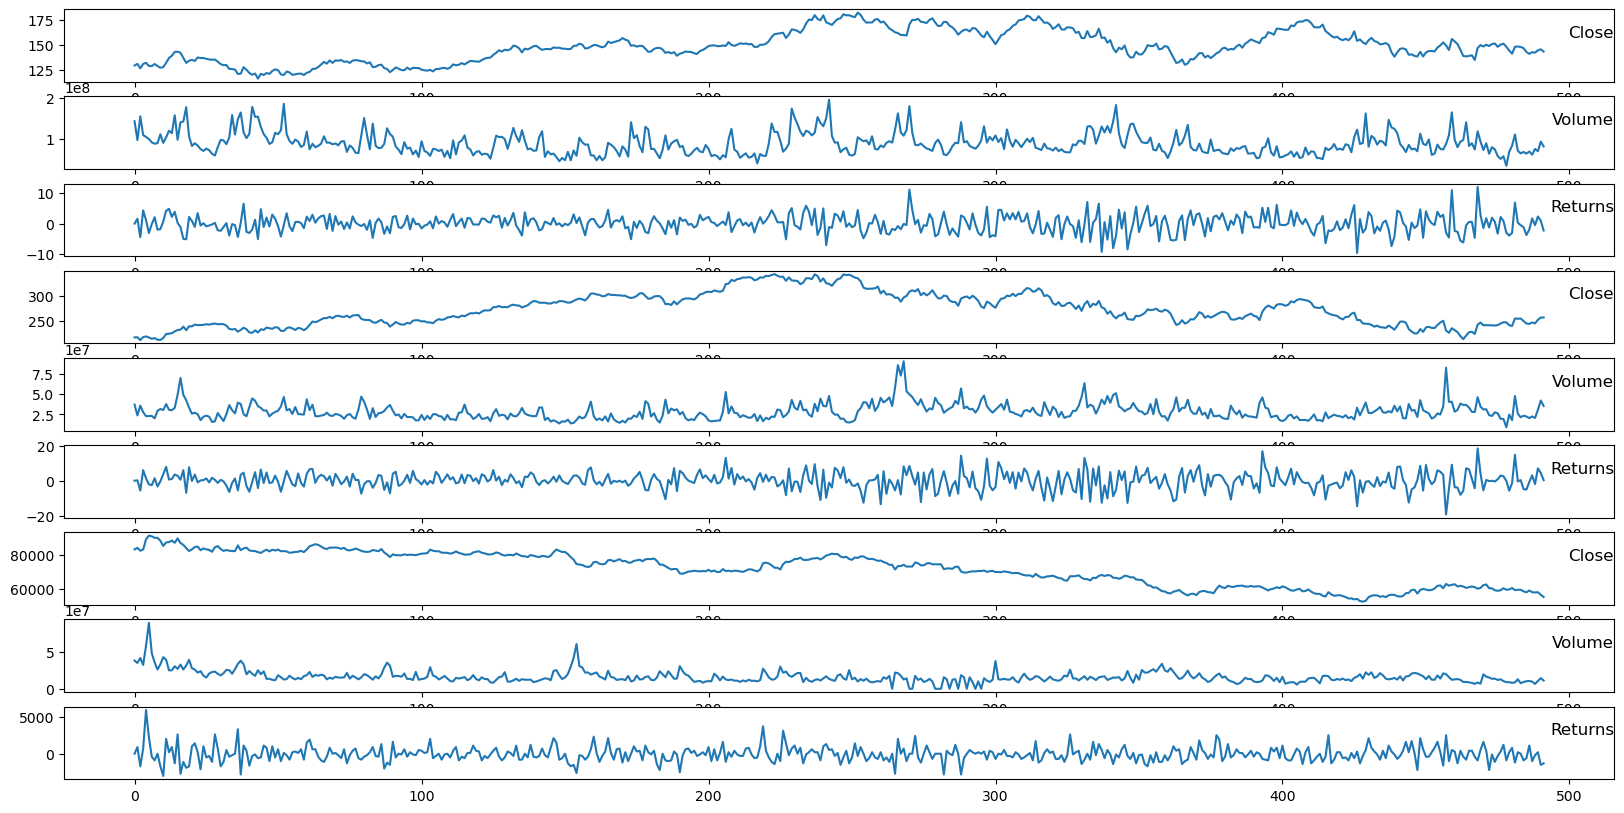

In [88]:
values = new.values

groups = [0, 1, 2, 3,4, 5, 6, 7, 8]
i = 1
# plot each column
plt.figure()
plt.figure(figsize=(20,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df_All.drop(columns = ['Date']).columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [89]:
values.shape

(492, 9)

In [90]:
from pandas import DataFrame
from pandas import concat

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
     cols.append(df.shift(i))
     names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
     cols.append(df.shift(-i))
     if i == 0:
         names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
     else:
         names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
     agg = concat(cols, axis=1)
     agg.columns = names
 # drop rows with NaN values
     if dropnan:
         agg.dropna(inplace=True)
     return agg

In [91]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error


# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17]], axis=1, inplace=True)
reframed.head(5)

#reframed.shape

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var1(t)
1,0.198781,0.674664,0.444187,0.041571,0.343838,0.511505,0.791667,0.428047,0.337079,0.223153
2,0.223153,0.389854,0.518295,0.043176,0.180014,0.517059,0.815104,0.391287,0.438202,0.155979
3,0.155979,0.748218,0.239926,0.000000,0.329072,0.362074,0.770833,0.466070,0.146067,0.221782
4,0.221782,0.464202,0.644280,0.046156,0.227676,0.671251,0.789063,0.361488,0.415730,0.238995
5,0.238995,0.436618,0.496526,0.056320,0.169343,0.546681,0.942708,0.653480,1.000000,0.192231


In [92]:
reframed.shape

(491, 10)

In [93]:
# split into train and test sets
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 1, 9) (200,) (291, 1, 9) (291,)


Epoch 1/50
3/3 - 3s - loss: 0.3669 - val_loss: 0.6784 - 3s/epoch - 887ms/step
Epoch 2/50
3/3 - 0s - loss: 0.3323 - val_loss: 0.6448 - 41ms/epoch - 14ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2980 - val_loss: 0.6112 - 63ms/epoch - 21ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2641 - val_loss: 0.5777 - 62ms/epoch - 21ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2304 - val_loss: 0.5439 - 38ms/epoch - 13ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1995 - val_loss: 0.5103 - 55ms/epoch - 18ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1727 - val_loss: 0.4769 - 41ms/epoch - 14ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1513 - val_loss: 0.4447 - 33ms/epoch - 11ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1369 - val_loss: 0.4143 - 51ms/epoch - 17ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1268 - val_loss: 0.3866 - 57ms/epoch - 19ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1216 - val_loss: 0.3626 - 56ms/epoch - 19ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1197 - val_loss: 0.3426 - 48ms/epoch - 16ms/step
Epoch 13/50
3/3 - 0s - loss: 0.1200 - val_loss: 0.

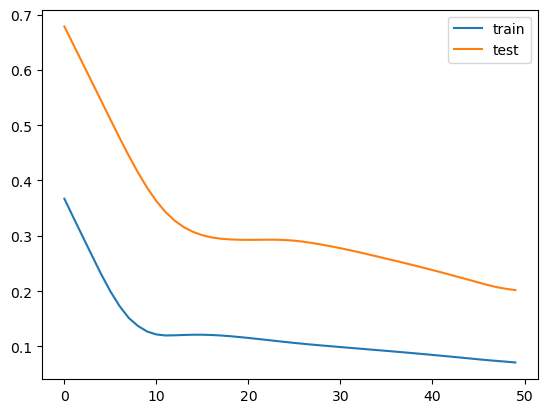

In [94]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step


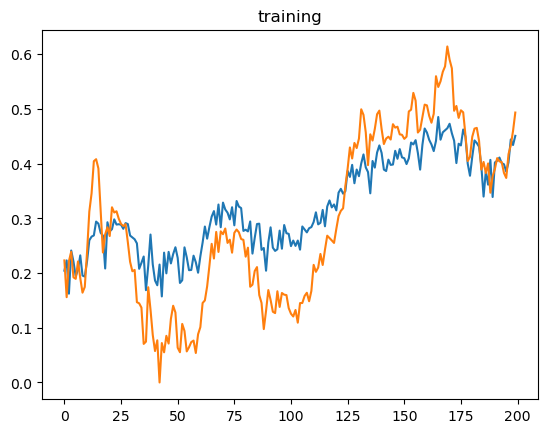

In [95]:
yhat_train = model.predict(train_X)
plt.plot(yhat_train)
plt.plot(train_y)
plt.title('training')
plt.show()

10/10 [==============================] - 0s 2ms/step


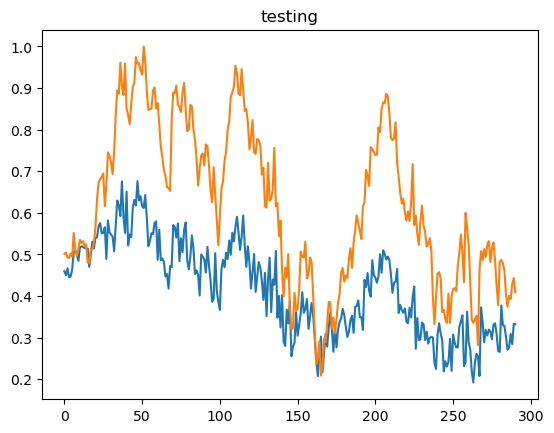

In [96]:
yhat = model.predict(test_X)

plt.plot(yhat)
plt.plot(test_y)
plt.title('testing')
plt.show()